In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

from CASutils import plotposition_utils as plotpos
from CASutils import mapplot_utils as maps
from CASutils import colorbar_utils as cbars
import xesmf as xe

import sys


import matplotlib.lines as lines

In [2]:
plotpath="/project/cas/islas/python_plots/snowpaper/FIGURES/fig13.pdf"

In [3]:
landfrac = xr.open_dataset("/project/cas/islas/cesmle/fx/landfraclens.nc")
landfrac = landfrac.LANDFRAC
landfrac = landfrac.isel(time=0)

In [4]:
path="/project/cas/islas/python_savs/snowpaper/DATA_SORT/deseasonalized_tvar/CMIP6/"

In [5]:
era5path = "/project/cas/islas/python_savs/snowpaper/DATA_SORT/deseasonalized_tvar/TVAR_ERA5.nc"
era5 = xr.open_dataset(era5path)

In [6]:
bestpath="/project/cas/islas/python_savs/snowpaper/DATA_SORT/deseasonalized_tvar/TVAR_BEST.nc"
best = xr.open_dataset(bestpath)
best = best.bestvar

In [7]:
lens1path="/project/cas/islas/python_savs/snowpaper/DATA_SORT/deseasonalized_tvar/LENS1_djf_var.nc"
lens1 = xr.open_dataset(lens1path)
lens1varm = lens1.djfvar.mean('member')

In [8]:
lens2path="/project/cas/islas/python_savs/snowpaper/DATA_SORT/deseasonalized_tvar/LENS2_djf_var.nc"
lens2 = xr.open_dataset(lens2path)
lens2varm = lens2.djfvar.mean('member')

In [9]:
wgtfile="/project/cas/islas/temp/wgt.nc"

grid_out = xr.Dataset({'lat': (['lat'], lens2.lat)}, {'lon': (['lon'], lens2.lon)})
regridder = xe.Regridder(best, grid_out, 'bilinear', periodic=True, reuse_weights=False, filename=wgtfile)
bestregrid = regridder(best)

/project/cas/islas/miniconda3/envs/islaenv/lib/python3.6/site-packages/xarray/core/dataarray.py:745: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return key in self.data


In [10]:
models=['ACCESS-CM2','ACCESS-ESM1-5','AWI-CM-1-1-MR','BCC-ESM1','CanESM5','CMCC-CM2-SR5','EC-Earth3','EC-Earth3-Veg','FGOALS-f3-L','FGOALS-g3','GFDL-CM4',
        'INM-CM5-0','IITM-ESM','IPSL-CM6A-LR','KIOST-ESM','MIROC6','MPI-ESM1-2-HR','MRI-ESM2-0','NESM3','TaiESM1']

models_title=['ACCESS-CM2','ACCESS-ESM1-5','AWI-CM-1-1-MR','BCC-ESM1*','CanESM5','CMCC-CM2-SR5*','EC-Earth3','EC-Earth3-Veg','FGOALS-f3-L*','FGOALS-g3*','GFDL-CM4',
        'INM-CM5-0','IITM-ESM','IPSL-CM6A-LR','KIOST-ESM','MIROC6','MPI-ESM1-2-HR','MRI-ESM2-0','NESM3','TaiESM1*']


In [11]:
x1=[0.04,0.23,0.42,0.61,0.8,
   0.04,0.23,0.42,0.61,0.8,
   0.04,0.23,0.42,0.61,0.8,
   0.04,0.23,0.42,0.61,0.8,
   0.04,0.23,0.42,0.61,0.8]
x2=[0.22,0.41,0.6,0.79,0.98,
   0.22,0.41,0.6,0.79,0.98,
   0.22,0.41,0.6,0.79,0.98,
   0.22,0.41,0.6,0.79,0.98,
   0.22,0.41,0.6,0.79,0.98]
y1=[0.85,0.85,0.85,0.85,0.85,
   0.72,0.72,0.72,0.72,0.72,
   0.59,0.59,0.59,0.59,0.59,
   0.46,0.46,0.46,0.46,0.46,
   0.33,0.33,0.33,0.33,0.33]
y2=[0.95,0.95,0.95,0.95,0.95,
   0.82,0.82,0.82,0.82,0.82,
   0.69,0.69,0.69,0.69,0.69,
   0.56,0.56,0.56,0.56,0.56,
   0.43,0.43,0.43,0.43,0.43]

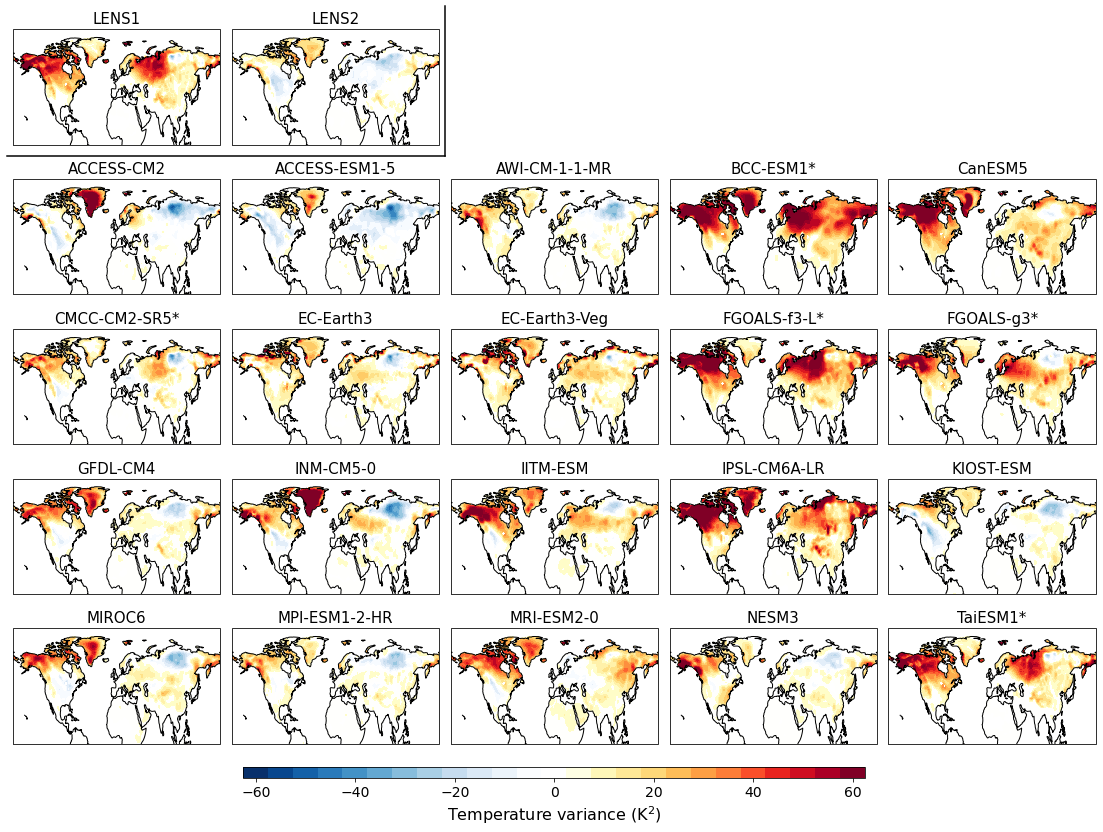

In [12]:
fig = plt.figure(figsize=(16,16))

ax = maps.contourmap_bothcontinents_fill_nh_pos(fig, (np.array(lens1varm) - np.array(bestregrid))*landfrac, lens1varm.lon, lens1varm.lat, 5, -60, 60,'LENS1',
                                                x1[0],x2[0],y1[0],y2[0], labels=False)

ax = maps.contourmap_bothcontinents_fill_nh_pos(fig, (np.array(lens2varm) - np.array(bestregrid))*landfrac, lens1varm.lon, lens1varm.lat, 5, -60, 60,'LENS2',
                                               x1[1],x2[1],y1[1],y2[1], labels=False)

fig.add_artist(lines.Line2D([0.035,0.415],[0.84,0.84], color='black'))
fig.add_artist(lines.Line2D([0.415,0.415],[0.84,0.97], color='black'))

for imodel in np.arange(0,len(models),1):
    file="/project/cas/islas/python_savs/snowpaper/DATA_SORT/deseasonalized_tvar/CMIP6/tasvar_"+models[imodel]+".nc"
    dat = xr.open_dataset(file)
    ax = maps.contourmap_bothcontinents_fill_nh_pos(fig, (np.array(dat.tasvar)-np.array(bestregrid))*landfrac, dat.lon, dat.lat, 5, -60, 60,models_title[imodel],
                                                   x1[imodel+5],x2[imodel+5],y1[imodel+5],y2[imodel+5], labels=False)

ax = cbars.plotcolorbar(fig, 5, -60,60,'Temperature variance (K$^{2}$)',x1[0]+0.2,x2[4]-0.2,y1[24]-0.03,y1[24]-0.02)
    
fig.savefig(plotpath, bbox_inches='tight', facecolor='white')
    